## Goal:

I have never seen these data sets before - I want to show the process of working with unknown datasets

1. import the data, fix the index
2. clean the data - if necessary
3. visualize the data - explain via diagrams the significant patterns in the data

In [3]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path_energy = '../DataScience/data/energy_dataset.csv'
path_weather = '../DataScience/data/weather_features.csv'

In [5]:
energy = pd.read_csv(path_energy)
weather = pd.read_csv(path_weather)

In [4]:
energy.shape

(35064, 29)

In [5]:
energy.head(25) #time appears to be the index - need to see if 01 is month or day

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,...,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,...,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,...,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [6]:
#the cell entries are consistent, 25 characters for each time value
energy['time'].str.len().unique()

array([25])

In [7]:
energy['time'] = energy['time'].str[:-6]

In [8]:
energy['time'].str.len().unique()

array([19])

In [9]:
#date format: %Y-%m-%d %X+%H:00
#2015-01-07 17:00:00+01:00 the last 6 characters are unecessary
energy['time'] = pd.to_datetime(energy['time'], format='%Y-%m-%d %X')

In [10]:
energy['time'].dtype

dtype('<M8[ns]')

In [11]:
energy.set_index('time', inplace=True)

In [12]:
energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


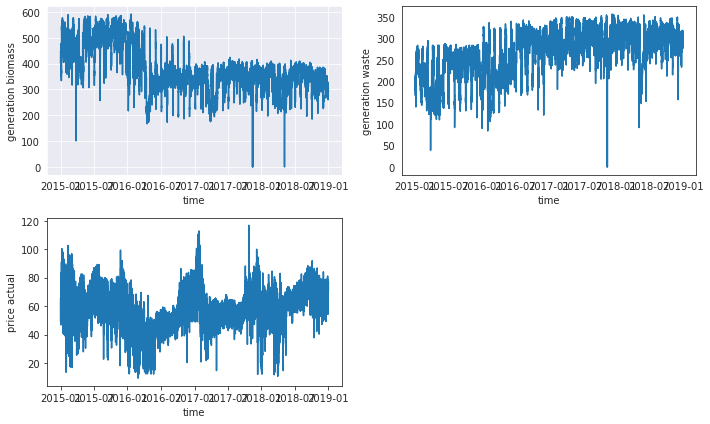

In [32]:
f = plt.figure(figsize=(10, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=energy['generation biomass'])

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.lineplot(data=energy['generation waste'])

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sns.lineplot(data=energy['price actual'])


f.tight_layout()

<ipython-input-37-52f3c2da26e5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=energy.index, rotation=45, ha='right')


[Text(16436.0, 0, '2015-01-01 00:00:00'),
 Text(16617.0, 0, '2015-01-01 01:00:00'),
 Text(16801.0, 0, '2015-01-01 02:00:00'),
 Text(16983.0, 0, '2015-01-01 03:00:00'),
 Text(17167.0, 0, '2015-01-01 04:00:00'),
 Text(17348.0, 0, '2015-01-01 05:00:00'),
 Text(17532.0, 0, '2015-01-01 06:00:00'),
 Text(17713.0, 0, '2015-01-01 07:00:00'),
 Text(17897.0, 0, '2015-01-01 08:00:00')]

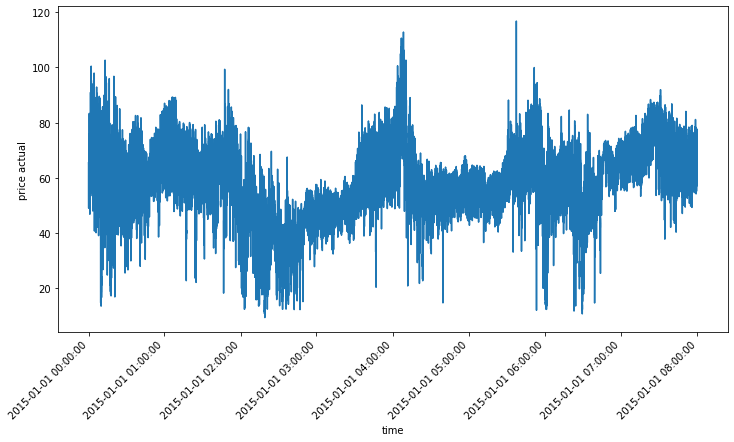

In [37]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(data=energy['price actual'])
ax.set_xticklabels(labels=energy.index, rotation=45, ha='right')

In [38]:
weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [39]:
weather['dt_iso'] = weather['dt_iso'].str[:-6]
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'], format='%Y-%m-%d %X')
weather.set_index('dt_iso', inplace=True)
weather.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [40]:
#we can visualize something fot he 5 different cities - e.g. temp
weather['city_name'].value_counts(normalize=True)

Madrid        0.203295
Bilbao        0.201524
Seville       0.199315
 Barcelona    0.198861
Valencia      0.197006
Name: city_name, dtype: float64

In [44]:
data = weather.loc[:,['city_name', 'temp']]
data.head()

,city_name,temp
dt_iso,,
2015-01-01 00:00:00,Valencia,270.475
2015-01-01 01:00:00,Valencia,270.475
2015-01-01 02:00:00,Valencia,269.686
2015-01-01 03:00:00,Valencia,269.686
2015-01-01 04:00:00,Valencia,269.686


<AxesSubplot:xlabel='dt_iso'>

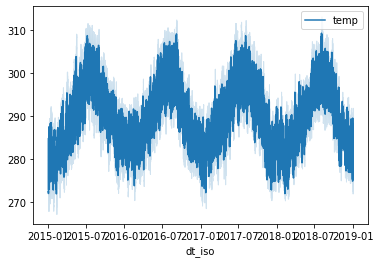

In [45]:
sns.lineplot(data=data)

In [46]:
data.shape

(178396, 2)

<AxesSubplot:xlabel='dt_iso', ylabel='temp'>

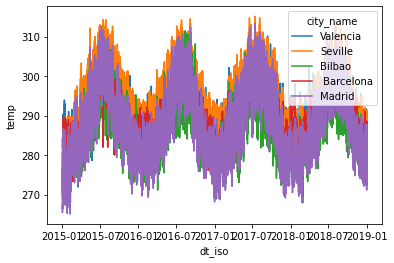

In [47]:
data = data.sample(50000)
sns.lineplot(data=data, x=data.index, y=data.temp, hue=data.city_name)